# 查漏补缺
## 模糊综合评价
评价某一个对象，如果其好坏不一定有明显的分界线，但是我们有外界对其的评语（例如，百分之多少的人认为很好，百分之多少的人认为一般等等），则可以用模糊综合评价


## FP-Growth算法
在第四题上的实践，这里尝试跑一下，只以高钾玻璃未风化为例

In [1]:
import numpy as np
import pandas as pd

data = pd.read_excel('Sheet2.xlsx')
data

,Unnamed: 0,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),Sum,category,weathering
0,0,01,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,97.61,0,1
1,1,02,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,99.89,1,0
2,2,03部位1,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,100.00,0,1
3,3,03部位2,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,98.88,0,1
4,4,04,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,96.06,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,64,54严重风化点,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00,96.92,1,0
63,65,55,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00,96.38,1,1
64,66,56,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00,92.24,1,0
65,67,57,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00,92.47,1,0


In [2]:
data=data[data['category']==1]
data=data[data['weathering']==1]
data

,Unnamed: 0,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),Sum,category,weathering
20,22,20,37.36,0.00,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75,0.00,0.00,0.00,88.41,1,1
24,26,24,31.94,0.00,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14,0.91,0.00,0.00,98.88,1,1
31,33,30部位1,34.34,0.00,1.41,4.49,0.98,4.35,2.12,0.00,39.22,10.29,0.00,0.35,0.40,0.00,97.95,1,1
32,34,30部位2,36.93,0.00,0.00,4.24,0.51,3.86,2.74,0.00,37.74,10.35,1.41,0.48,0.44,0.00,98.70,1,1
33,35,31,65.91,0.00,0.00,1.60,0.89,3.11,4.59,0.44,16.55,3.42,1.62,0.30,0.00,0.00,98.43,1,1
34,36,32,69.71,0.00,0.21,0.46,0.00,2.36,1.00,0.11,19.76,4.88,0.17,0.00,0.00,0.00,98.66,1,1
35,37,33,75.51,0.00,0.15,0.64,1.00,2.35,0.00,0.47,16.16,3.55,0.13,0.00,0.00,0.00,99.96,1,1
37,39,35,65.91,0.00,0.00,0.38,0.00,1.44,0.17,0.16,22.05,5.68,0.42,0.00,0.00,0.00,96.21,1,1
39,41,37,60.12,0.00,0.23,0.89,0.00,2.72,0.00,3.01,17.24,10.34,1.46,0.31,0.00,3.66,99.98,1,1
49,51,45,61.28,2.66,0.11,0.84,0.74,5.00,0.00,0.53,15.99,10.96,0.00,0.23,0.00,0.00,98.34,1,1


In [3]:
df=data.drop(columns=['category','weathering','Unnamed: 0','文物采样点','Sum'],axis=1)
df

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
20,37.36,0.00,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75,0.00,0.00,0.00
24,31.94,0.00,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14,0.91,0.00,0.00
31,34.34,0.00,1.41,4.49,0.98,4.35,2.12,0.00,39.22,10.29,0.00,0.35,0.40,0.00
32,36.93,0.00,0.00,4.24,0.51,3.86,2.74,0.00,37.74,10.35,1.41,0.48,0.44,0.00
33,65.91,0.00,0.00,1.60,0.89,3.11,4.59,0.44,16.55,3.42,1.62,0.30,0.00,0.00
34,69.71,0.00,0.21,0.46,0.00,2.36,1.00,0.11,19.76,4.88,0.17,0.00,0.00,0.00
35,75.51,0.00,0.15,0.64,1.00,2.35,0.00,0.47,16.16,3.55,0.13,0.00,0.00,0.00
37,65.91,0.00,0.00,0.38,0.00,1.44,0.17,0.16,22.05,5.68,0.42,0.00,0.00,0.00
39,60.12,0.00,0.23,0.89,0.00,2.72,0.00,3.01,17.24,10.34,1.46,0.31,0.00,3.66
49,61.28,2.66,0.11,0.84,0.74,5.00,0.00,0.53,15.99,10.96,0.00,0.23,0.00,0.00


In [4]:
df_selected=df.copy()
df_selected

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
20,37.36,0.00,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75,0.00,0.00,0.00
24,31.94,0.00,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14,0.91,0.00,0.00
31,34.34,0.00,1.41,4.49,0.98,4.35,2.12,0.00,39.22,10.29,0.00,0.35,0.40,0.00
32,36.93,0.00,0.00,4.24,0.51,3.86,2.74,0.00,37.74,10.35,1.41,0.48,0.44,0.00
33,65.91,0.00,0.00,1.60,0.89,3.11,4.59,0.44,16.55,3.42,1.62,0.30,0.00,0.00
34,69.71,0.00,0.21,0.46,0.00,2.36,1.00,0.11,19.76,4.88,0.17,0.00,0.00,0.00
35,75.51,0.00,0.15,0.64,1.00,2.35,0.00,0.47,16.16,3.55,0.13,0.00,0.00,0.00
37,65.91,0.00,0.00,0.38,0.00,1.44,0.17,0.16,22.05,5.68,0.42,0.00,0.00,0.00
39,60.12,0.00,0.23,0.89,0.00,2.72,0.00,3.01,17.24,10.34,1.46,0.31,0.00,3.66
49,61.28,2.66,0.11,0.84,0.74,5.00,0.00,0.53,15.99,10.96,0.00,0.23,0.00,0.00


In [5]:
df_selected.columns=['SiO2','Na2O','K2O','CaO','MgO','Al2O3','Fe2O3','CuO','PbO','BaO','P2O5','SrO','SnO2','SO2']
df_selected

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
20,37.36,0.00,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75,0.00,0.00,0.00
24,31.94,0.00,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14,0.91,0.00,0.00
31,34.34,0.00,1.41,4.49,0.98,4.35,2.12,0.00,39.22,10.29,0.00,0.35,0.40,0.00
32,36.93,0.00,0.00,4.24,0.51,3.86,2.74,0.00,37.74,10.35,1.41,0.48,0.44,0.00
33,65.91,0.00,0.00,1.60,0.89,3.11,4.59,0.44,16.55,3.42,1.62,0.30,0.00,0.00
34,69.71,0.00,0.21,0.46,0.00,2.36,1.00,0.11,19.76,4.88,0.17,0.00,0.00,0.00
35,75.51,0.00,0.15,0.64,1.00,2.35,0.00,0.47,16.16,3.55,0.13,0.00,0.00,0.00
37,65.91,0.00,0.00,0.38,0.00,1.44,0.17,0.16,22.05,5.68,0.42,0.00,0.00,0.00
39,60.12,0.00,0.23,0.89,0.00,2.72,0.00,3.01,17.24,10.34,1.46,0.31,0.00,3.66
49,61.28,2.66,0.11,0.84,0.74,5.00,0.00,0.53,15.99,10.96,0.00,0.23,0.00,0.00


In [6]:
df_selected.drop(['Na2O','SrO','SnO2','SO2'],axis=1,inplace=True)

In [7]:
df_selected

,SiO2,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5
20,37.36,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75
24,31.94,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14
31,34.34,1.41,4.49,0.98,4.35,2.12,0.00,39.22,10.29,0.00
32,36.93,0.00,4.24,0.51,3.86,2.74,0.00,37.74,10.35,1.41
33,65.91,0.00,1.60,0.89,3.11,4.59,0.44,16.55,3.42,1.62
34,69.71,0.21,0.46,0.00,2.36,1.00,0.11,19.76,4.88,0.17
35,75.51,0.15,0.64,1.00,2.35,0.00,0.47,16.16,3.55,0.13
37,65.91,0.00,0.38,0.00,1.44,0.17,0.16,22.05,5.68,0.42
39,60.12,0.23,0.89,0.00,2.72,0.00,3.01,17.24,10.34,1.46
49,61.28,0.11,0.84,0.74,5.00,0.00,0.53,15.99,10.96,0.00


In [8]:
columns_name=df_selected.columns.tolist()
print(columns_name)

df_converted=df_selected.copy()

for j in columns_name:
    # 假设你的DataFrame叫做df_selected，column_name是你想计算分位数的列名
    column_name = j

    # 获取最小值和最大值
    min_value = df_selected[column_name].min()
    max_value = df_selected[column_name].max()

    # 计算距离并分为五等分
    distance = max_value - min_value
    increments = [distance * i / 4 for i in range(5)]

    # 计算五等分的分位数值
    percentile_values = [min_value + increment for increment in increments]

    print(f'列{j}的均分结果：')
    # 打印结果
    for i, value in enumerate(percentile_values):
        print(f'{(i+1)*20}% 分位数值: {value}')
        
        
    ### 替换过程
    # 遍历列中的数据并判断所属部分，然后进行替换
    for index, value in df_converted[column_name].items():
        if value <= percentile_values[0]:
            df_converted.at[index, column_name] = str(j) + str('分级1')
        elif value <= percentile_values[1]:
            df_converted.at[index, column_name] = str(j) + str('分级2')
        elif value <= percentile_values[2]:
            df_converted.at[index, column_name] = str(j) + str('分级3')
        elif value <= percentile_values[3]:
            df_converted.at[index, column_name] = str(j) + str('分级4')
        else:
            df_converted.at[index, column_name] = str(j) + str('分级5')
    
df_converted

['SiO2', 'K2O', 'CaO', 'MgO', 'Al2O3', 'Fe2O3', 'CuO', 'PbO', 'BaO', 'P2O5']
列SiO2的均分结果：
20% 分位数值: 31.94
40% 分位数值: 42.8325
60% 分位数值: 53.72500000000001
80% 分位数值: 64.6175
100% 分位数值: 75.51
列K2O的均分结果：
20% 分位数值: 0.0
40% 分位数值: 0.3525
60% 分位数值: 0.705
80% 分位数值: 1.0574999999999999
100% 分位数值: 1.41
列CaO的均分结果：
20% 分位数值: 0.0
40% 分位数值: 1.1225
60% 分位数值: 2.245
80% 分位数值: 3.3675
100% 分位数值: 4.49
列MgO的均分结果：
20% 分位数值: 0.0
40% 分位数值: 0.4175
60% 分位数值: 0.835
80% 分位数值: 1.2525
100% 分位数值: 1.67
列Al2O3的均分结果：
20% 分位数值: 1.44
40% 分位数值: 2.4425
60% 分位数值: 3.445
80% 分位数值: 4.4475
100% 分位数值: 5.449999999999999
列Fe2O3的均分结果：
20% 分位数值: 0.0
40% 分位数值: 1.1475
60% 分位数值: 2.295
80% 分位数值: 3.4425
100% 分位数值: 4.59
列CuO的均分结果：
20% 分位数值: 0.0
40% 分位数值: 2.115
60% 分位数值: 4.23
80% 分位数值: 6.345000000000001
100% 分位数值: 8.46
列PbO的均分结果：
20% 分位数值: 9.3
40% 分位数值: 16.78
60% 分位数值: 24.259999999999998
80% 分位数值: 31.74
100% 分位数值: 39.22
列BaO的均分结果：
20% 分位数值: 3.42
40% 分位数值: 9.1225
60% 分位数值: 14.825000000000001
80% 分位数值: 20.527500000000003
100% 分位数值: 26.23000000000

,SiO2,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5
20,SiO2分级2,K2O分级4,CaO分级1,MgO分级1,Al2O3分级5,Fe2O3分级3,CuO分级4,PbO分级1,BaO分级5,P2O5分级5
24,SiO2分级1,K2O分级1,CaO分级2,MgO分级1,Al2O3分级2,Fe2O3分级1,CuO分级5,PbO分级4,BaO分级5,P2O5分级2
31,SiO2分级2,K2O分级5,CaO分级5,MgO分级4,Al2O3分级4,Fe2O3分级3,CuO分级1,PbO分级5,BaO分级3,P2O5分级1
32,SiO2分级2,K2O分级1,CaO分级5,MgO分级3,Al2O3分级4,Fe2O3分级4,CuO分级1,PbO分级5,BaO分级3,P2O5分级2
33,SiO2分级5,K2O分级1,CaO分级3,MgO分级4,Al2O3分级3,Fe2O3分级5,CuO分级2,PbO分级2,BaO分级1,P2O5分级3
34,SiO2分级5,K2O分级2,CaO分级2,MgO分级1,Al2O3分级2,Fe2O3分级2,CuO分级2,PbO分级3,BaO分级2,P2O5分级2
35,SiO2分级5,K2O分级2,CaO分级2,MgO分级4,Al2O3分级2,Fe2O3分级1,CuO分级2,PbO分级2,BaO分级2,P2O5分级2
37,SiO2分级5,K2O分级1,CaO分级2,MgO分级1,Al2O3分级1,Fe2O3分级2,CuO分级2,PbO分级3,BaO分级2,P2O5分级2
39,SiO2分级4,K2O分级2,CaO分级2,MgO分级1,Al2O3分级3,Fe2O3分级1,CuO分级3,PbO分级3,BaO分级3,P2O5分级3
49,SiO2分级4,K2O分级2,CaO分级2,MgO分级3,Al2O3分级5,Fe2O3分级1,CuO分级2,PbO分级2,BaO分级3,P2O5分级1


In [9]:
df=df_converted.values.tolist()
df

[['SiO2分级2',
  'K2O分级4',
  'CaO分级1',
  'MgO分级1',
  'Al2O3分级5',
  'Fe2O3分级3',
  'CuO分级4',
  'PbO分级1',
  'BaO分级5',
  'P2O5分级5'],
 ['SiO2分级1',
  'K2O分级1',
  'CaO分级2',
  'MgO分级1',
  'Al2O3分级2',
  'Fe2O3分级1',
  'CuO分级5',
  'PbO分级4',
  'BaO分级5',
  'P2O5分级2'],
 ['SiO2分级2',
  'K2O分级5',
  'CaO分级5',
  'MgO分级4',
  'Al2O3分级4',
  'Fe2O3分级3',
  'CuO分级1',
  'PbO分级5',
  'BaO分级3',
  'P2O5分级1'],
 ['SiO2分级2',
  'K2O分级1',
  'CaO分级5',
  'MgO分级3',
  'Al2O3分级4',
  'Fe2O3分级4',
  'CuO分级1',
  'PbO分级5',
  'BaO分级3',
  'P2O5分级2'],
 ['SiO2分级5',
  'K2O分级1',
  'CaO分级3',
  'MgO分级4',
  'Al2O3分级3',
  'Fe2O3分级5',
  'CuO分级2',
  'PbO分级2',
  'BaO分级1',
  'P2O5分级3'],
 ['SiO2分级5',
  'K2O分级2',
  'CaO分级2',
  'MgO分级1',
  'Al2O3分级2',
  'Fe2O3分级2',
  'CuO分级2',
  'PbO分级3',
  'BaO分级2',
  'P2O5分级2'],
 ['SiO2分级5',
  'K2O分级2',
  'CaO分级2',
  'MgO分级4',
  'Al2O3分级2',
  'Fe2O3分级1',
  'CuO分级2',
  'PbO分级2',
  'BaO分级2',
  'P2O5分级2'],
 ['SiO2分级5',
  'K2O分级1',
  'CaO分级2',
  'MgO分级1',
  'Al2O3分级1',
  'Fe2O3分级2',
  'CuO分级2',
  'PbO分级3',
  'BaO分级2'

### 使用FP-GROWTH
这里惊奇地发现有现成的库，非常好用，文章链接：
https://www.kaggle.com/code/mbalvi75/14-fp-growth

In [10]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

In [11]:
dataset = [['mbalvi', '5 kilo meters', 'remember to Walk'], ['mbalvi', 'remember to Walk'],
['Divergent', 'Hassan','remember to Walk'], ['mbalvi', 'Five kilo meters'],
['Divergent','Hassan']] 
te = TransactionEncoder()
te_array = te.fit(df).transform(df)
df = pd.DataFrame(te_array, columns=te.columns_)
df

,Al2O3分级1,Al2O3分级2,Al2O3分级3,Al2O3分级4,Al2O3分级5,BaO分级1,BaO分级2,BaO分级3,BaO分级5,CaO分级1,...,PbO分级1,PbO分级2,PbO分级3,PbO分级4,PbO分级5,SiO2分级1,SiO2分级2,SiO2分级3,SiO2分级4,SiO2分级5
0,False,False,False,False,True,False,False,False,True,True,...,True,False,False,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
2,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
3,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
4,False,False,True,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
5,False,True,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
6,False,True,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
7,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
8,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
9,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [12]:
frequent_itemsets_fp=fpgrowth(df, min_support=0.3, use_colnames=True)

In [13]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.82)
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Al2O3分级2),(P2O5分级2),0.307692,0.615385,0.307692,1.000000,1.625000,0.118343,inf,0.555556
1,"(BaO分级3, Fe2O3分级1)",(K2O分级2),0.307692,0.461538,0.307692,1.000000,2.166667,0.165680,inf,0.777778
2,"(BaO分级3, K2O分级2)",(Fe2O3分级1),0.307692,0.538462,0.307692,1.000000,1.857143,0.142012,inf,0.666667
3,(SiO2分级5),(CuO分级2),0.307692,0.615385,0.307692,1.000000,1.625000,0.118343,inf,0.555556
4,(K2O分级2),(CaO分级2),0.461538,0.538462,0.384615,0.833333,1.547619,0.136095,2.769231,0.657143
5,(K2O分级2),(CuO分级2),0.461538,0.615385,0.384615,0.833333,1.354167,0.100592,2.307692,0.485714
6,(K2O分级2),(Fe2O3分级1),0.461538,0.538462,0.384615,0.833333,1.547619,0.136095,2.769231,0.657143
7,"(K2O分级2, P2O5分级2)",(CuO分级2),0.307692,0.615385,0.307692,1.000000,1.625000,0.118343,inf,0.555556
8,(BaO分级2),(CuO分级2),0.307692,0.615385,0.307692,1.000000,1.625000,0.118343,inf,0.555556
9,(BaO分级2),(P2O5分级2),0.307692,0.615385,0.307692,1.000000,1.625000,0.118343,inf,0.555556


In [14]:
frequent_itemsets_fp

,support,itemsets
0,0.461538,(MgO分级1)
1,0.615385,(P2O5分级2)
2,0.538462,(Fe2O3分级1)
3,0.538462,(CaO分级2)
4,0.384615,(K2O分级1)
5,0.307692,(Al2O3分级2)
6,0.461538,(BaO分级3)
7,0.615385,(CuO分级2)
8,0.307692,(SiO2分级5)
9,0.461538,(K2O分级2)



## 灰色关联分析
几何形状越相似，关联度越大；在数据量较小且不满足部分统计规律的时候是有实用性的

一般大数据量少特征的话多元关联分析就可以解决，但是灰色关联分析可以用来分析更极端的情况

https://blog.csdn.net/weixin_43819566/article/details/112914383

In [19]:
df_selected.corr(method='spearman')

,SiO2,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5
SiO2,1.000000,-0.135834,-0.261708,0.166386,-0.239340,-0.086730,-0.264463,-0.613481,-0.740028,0.033058
K2O,-0.135834,1.000000,-0.152813,0.273471,0.559545,-0.043010,0.067917,-0.107387,0.175211,-0.240539
CaO,-0.261708,-0.152813,1.000000,0.186642,0.005502,0.322994,-0.418733,0.481431,-0.090784,-0.121212
MgO,0.166386,0.273471,0.186642,1.000000,0.439233,0.015707,-0.338559,0.000000,-0.265852,-0.416688
Al2O3,-0.239340,0.559545,0.005502,0.439233,1.000000,0.286712,-0.030261,-0.263736,0.428571,0.005502
Fe2O3,-0.086730,-0.043010,0.322994,0.015707,0.286712,1.000000,-0.613091,0.083624,-0.149329,0.415706
CuO,-0.264463,0.067917,-0.418733,-0.338559,-0.030261,-0.613091,1.000000,-0.277854,0.451170,0.207989
PbO,-0.613481,-0.107387,0.481431,0.000000,-0.263736,0.083624,-0.277854,1.000000,0.093407,-0.255846
BaO,-0.740028,0.175211,-0.090784,-0.265852,0.428571,-0.149329,0.451170,0.093407,1.000000,-0.041266
P2O5,0.033058,-0.240539,-0.121212,-0.416688,0.005502,0.415706,0.207989,-0.255846,-0.041266,1.000000


In [15]:
df_selected

,SiO2,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5
20,37.36,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75
24,31.94,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14
31,34.34,1.41,4.49,0.98,4.35,2.12,0.00,39.22,10.29,0.00
32,36.93,0.00,4.24,0.51,3.86,2.74,0.00,37.74,10.35,1.41
33,65.91,0.00,1.60,0.89,3.11,4.59,0.44,16.55,3.42,1.62
34,69.71,0.21,0.46,0.00,2.36,1.00,0.11,19.76,4.88,0.17
35,75.51,0.15,0.64,1.00,2.35,0.00,0.47,16.16,3.55,0.13
37,65.91,0.00,0.38,0.00,1.44,0.17,0.16,22.05,5.68,0.42
39,60.12,0.23,0.89,0.00,2.72,0.00,3.01,17.24,10.34,1.46
49,61.28,0.11,0.84,0.74,5.00,0.00,0.53,15.99,10.96,0.00


13 10
[[0.12439752 0.5035461  0.         0.         1.         0.32897603
  0.56501182 0.         0.88250767 1.        ]
 [0.         0.         0.10467706 0.         0.03740648 0.
  1.         0.6631016  1.         0.02434783]
 [0.05508377 1.         1.         0.58682635 0.72568579 0.46187364
  0.         1.         0.30118369 0.        ]
 [0.11452835 0.         0.94432071 0.30538922 0.60349127 0.59694989
  0.         0.95053476 0.30381412 0.24521739]
 [0.77966491 0.         0.35634744 0.53293413 0.41645885 1.
  0.05200946 0.24231283 0.         0.28173913]
 [0.86688088 0.14893617 0.10244989 0.         0.22942643 0.21786492
  0.01300236 0.34959893 0.06400701 0.02956522]
 [1.         0.10638298 0.14253898 0.5988024  0.22693267 0.
  0.05555556 0.22927807 0.00569925 0.0226087 ]
 [0.77966491 0.         0.08463252 0.         0.         0.03703704
  0.01891253 0.42613636 0.09907935 0.07304348]
 [0.6467753  0.16312057 0.19821826 0.         0.319202   0.
  0.35579196 0.26537433 0.30337571 0.2

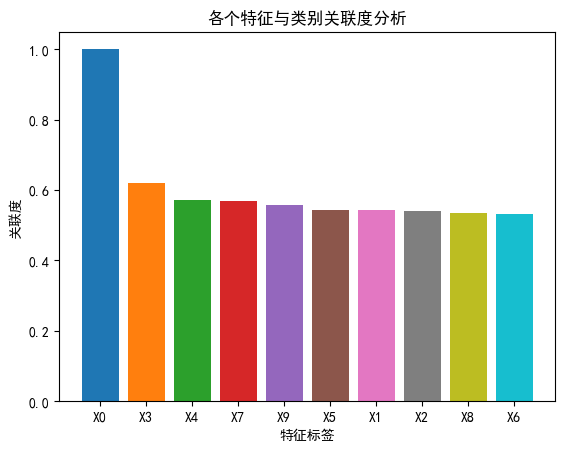

In [22]:
### 这段代码是把第一列作为参考矩阵
# 原论文是将每一列都作为过参考矩阵进行过求解分析，现在我们假设把第一列也算进来

import pandas as pd
from matplotlib import pyplot as plt

# 读入数据集
data = df_selected.copy()

#得到行数和列数
[m,n]=data.shape

print(m, n)

# 原始数据序列
data = data.values.astype('float')

# 数据的标准化
for i in range(0, n):
    maxi = max(data[:, i])
    mini = min(data[:, i])
    data[:, i] = (data[:, i] - mini) / (maxi - mini)



# 写入文件
df = pd.DataFrame(data) # 组成一个csv
df.to_csv("./标准化矩阵.csv", index=False)


# 求差值序列
delta = abs((data - data[:, 0].reshape(len(data), 1)))


# delta = abs((data - data[:, 0].reshape(len(data), 1))[:, 1:])
# 这一段代码的作用是进行切片
# 实际使用中，要区分


# 写入文件
df = pd.DataFrame(delta) # 组成一个csv
df.to_csv("./差值矩阵.csv", index=False)

# 差值矩阵的最大值与最小值
max_delta = delta.max()
min_delta = delta.min()

# 分辨系数ro通常为 0.5
rho = 0.5

# 求关联系数xi

Xi = (min_delta + rho * max_delta) / (delta + rho * max_delta)
gamma = Xi.mean(axis=0)


# 写入文件
df = pd.DataFrame(gamma)
df.to_csv("./关联系数.csv", index=False)

print('关联系数 = ', gamma)

# 关联系数按照降序排序
sort_y = sorted(gamma, reverse=True)
ordered_list = sorted(range(len(gamma)), key=lambda k: gamma[k], reverse=True)

# 按照关联性降序排序生成柱状图
x_data = [f"X{ordered_list[i]}" for i in range(0, len(ordered_list))]
y_data = sort_y

# 正确显示中文和负号
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 画柱状图
for i in range(len(x_data)):
    plt.bar(x_data[i], y_data[i])

# 设置图片名称
plt.title("各个特征与类别关联度分析")
# 设置x轴标签名
plt.xlabel("特征标签")
# 设置y轴标签名
plt.ylabel("关联度")
# 显示
plt.show()

接下来是一个自关联矩阵的画热力图版本

In [31]:
### 这段代码是把第一列作为参考矩阵
# 原论文是将每一列都作为过参考矩阵进行过求解分析，现在我们假设把第一列也算进来

import pandas as pd
from matplotlib import pyplot as plt

# 读入数据集
data = df_selected.copy()

#得到行数和列数
[m,n]=data.shape

print(m, n)

# 原始数据序列
data = data.values.astype('float')

# 数据的标准化
for i in range(0, n):
    maxi = max(data[:, i])
    mini = min(data[:, i])
    data[:, i] = (data[:, i] - mini) / (maxi - mini)



# 写入文件
df = pd.DataFrame(data) # 组成一个csv
df.to_csv("./标准化矩阵.csv", index=False)

corr =[]
for i in range(data.shape[1]):
    # 求差值序列
    delta = abs((data - data[:, i].reshape(len(data), 1)))

    # delta = abs((data - data[:, 0].reshape(len(data), 1))[:, 1:])
    # 这一段代码的作用是进行切片
    # 实际使用中，要区分

    # 差值矩阵的最大值与最小值
    max_delta = delta.max()
    min_delta = delta.min()

    # 分辨系数ro通常为 0.5
    rho = 0.5

    # 求关联系数xi

    Xi = (min_delta + rho * max_delta) / (delta + rho * max_delta)
    gamma = Xi.mean(axis=0)

    print('关联系数 = ', gamma)
    
    corr.append(gamma)

    # 关联系数按照降序排序
    sort_y = sorted(gamma, reverse=True)
    ordered_list = sorted(range(len(gamma)), key=lambda k: gamma[k], reverse=True)

    # 按照关联性降序排序生成柱状图
    x_data = [f"X{ordered_list[i]}" for i in range(0, len(ordered_list))]
    y_data = sort_y

# 正确显示中文和负号
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

13 10
关联系数 =  [1.         0.54308261 0.54102905 0.61879608 0.57193485 0.54366766
 0.53204766 0.5694179  0.53527183 0.55867316]
关联系数 =  [0.54308261 1.         0.77641481 0.68407662 0.69463866 0.74709515
 0.79165399 0.62922831 0.71918928 0.74945973]
关联系数 =  [0.54102905 0.77641481 1.         0.68315862 0.67873302 0.71325805
 0.66920221 0.75088204 0.68274499 0.73057937]
关联系数 =  [0.61879608 0.68407662 0.68315862 1.         0.73523202 0.69814136
 0.59869975 0.59585167 0.64444185 0.6617108 ]
关联系数 =  [0.57193485 0.69463866 0.67873302 0.73523202 1.         0.68845914
 0.60555262 0.63301112 0.65784116 0.70294507]
关联系数 =  [0.54366766 0.74709515 0.71325805 0.69814136 0.68845914 1.
 0.68651644 0.55654712 0.64662491 0.76691056]
关联系数 =  [0.53204766 0.79165399 0.66920221 0.59869975 0.60555262 0.68651644
 1.         0.57195399 0.79136368 0.80575234]
关联系数 =  [0.5694179  0.62922831 0.75088204 0.59585167 0.63301112 0.55654712
 0.57195399 1.         0.61087911 0.57054814]
关联系数 =  [0.53527183 0.71918928 0.6

<Axes: >

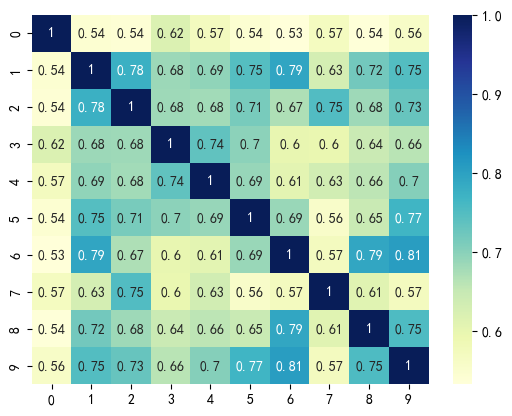

In [32]:
import seaborn as sns
# 绘制相关系数热力图
sns.heatmap(corr, annot=True, cmap="YlGnBu")

<Axes: >

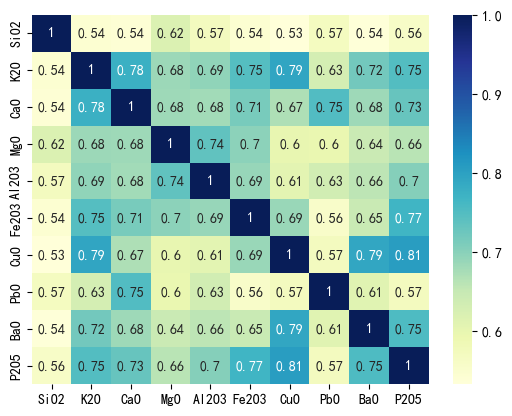

In [38]:
corr=pd.DataFrame(corr)
corr.index=df_selected.columns
corr.columns=df_selected.columns
sns.heatmap(corr, annot=True, cmap="YlGnBu")